In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

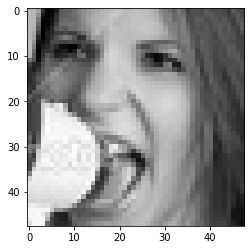

In [ ]:
datadir = "/content/drive/MyDrive/Datasets/archive/train" #/content/drive/MyDrive/Datasets/seg_train

categories = ["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]

for cat in categories:
  path = os.path.join(datadir, cat)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break


In [ ]:
print(img_array.shape) #48x148 images same sized images 

(48, 48)


In [ ]:
training_data = []

def create_training_data():
  for cat in categories:
    path = os.path.join(datadir, cat)
    class_num = categories.index(cat) #label the data with numbers
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
      new_array = cv2.resize(img_array, (48, 48))
      training_data.append([new_array, class_num])

create_training_data()

In [ ]:
print(len(training_data)) #training data is 14K

28709


In [ ]:
import random 

random.shuffle(training_data) 

In [ ]:
#for sample in training_data[:10]:
  #print(sample[1])
img_shp = 48

X = []
y = []

for features, label in training_data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(28709,img_shp, img_shp, 1) #28709 samples, height, width, color_dept
y = np.array(y)

In [ ]:
import pickle
import drive

#drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/Belgeler'

pickle_out = open(data_path + "/X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

In [ ]:
pickle_out = open(data_path + "/y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

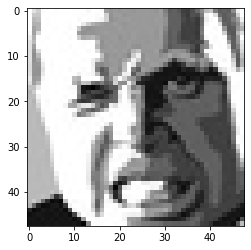

In [ ]:
test_data_dir = "/content/drive/MyDrive/Datasets/archive/test"

categories = ["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]

for cat in categories:
  path = os.path.join(test_data_dir, cat)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break

In [ ]:
test_data = []

def create_test_data():
  for cat in categories:
    path = os.path.join(test_data_dir, cat)
    class_num = categories.index(cat)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
      new_array = cv2.resize(img_array, (48, 48))
      test_data.append([new_array, class_num])

In [ ]:
create_test_data()

In [ ]:
import random 

random.shuffle(test_data)

In [ ]:
img_shp = 48

X_test = []
y_test = []

for features, labels in test_data:
  X_test.append(features)
  y_test.append(labels)

X_test = np.array(X_test).reshape(7178, img_shp, img_shp, 1) #7178 sample 48 48 color_dept
y_test = np.array(y_test)

In [ ]:
print(len(test_data))

7178


In [1]:
import pickle

data_path = '/content/drive/MyDrive/Belgeler'

pickle_out = open(data_path + "/X_test.pickle", "wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

NameError: ignored

In [ ]:
data_path = '/content/drive/MyDrive/Belgeler'

pickle_out = open(data_path + "/y_test.pickle", "wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization

In [ ]:
X = X/255.0
model = Sequential() 
#model.add(Conv2D(75, (3,3), strides=1, padding="same", activation="relu", input_shape = X.shape[1:]))
#model.add(Activation("relu"))
#model.add(MaxPool2D(pool_size=(2,2)))
#model.add(BatchNormalization())

In [ ]:
#model.add(Conv2D(64, (3,3)))
#model.add(Activation("relu"))
#model.add(MaxPool2D(pool_size=(2,2)))
#model.add(MaxPool2D((2,2), strides=2,padding="same"))
#model.add(Conv2D(50, (3,3), strides=1, padding="same", activation="relu"))

In [ ]:
#model.add(Flatten())
#model.add(Dense(64))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())

In [ ]:
#model.add(Flatten())
#model.add(Dense(1))
#model.add(Activation('sigmoid'))
#model.add(MaxPool2D((2,2), strides=2, padding="same"))
#model.add(Conv2D(25, (3,3), strides=1, padding="same", activation="relu"))

In [ ]:
#model.add(BatchNormalization())
#model.add(MaxPool2D((2,2), strides=2, padding="same"))

In [ ]:
#model.add(Flatten())
#model.add(Dense(units=32, activation="relu"))

In [ ]:
#model.add(Dropout(0.3))
#model.add(Dense(units=7, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 75)        750       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 75)        300       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 75)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 50)        33800     
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 50)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 50)        200       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 50)        0

In [ ]:
model.compile(optimizer="rmsprop" ,loss="sparse_categorical_crossentropy", metrics=['accuracy'] )

In [ ]:
model.fit(X, y, epochs=15, validation_split=0.3)

Epoch 1/15
628/628 [==============================] - 207s 330ms/step - loss: 1.2390 - accuracy: 0.5194 - val_loss: 1.3937 - val_accuracy: 0.4675
Epoch 2/15
628/628 [==============================] - 207s 329ms/step - loss: 1.2138 - accuracy: 0.5345 - val_loss: 1.3447 - val_accuracy: 0.4809
Epoch 3/15
628/628 [==============================] - 205s 327ms/step - loss: 1.1920 - accuracy: 0.5423 - val_loss: 1.4470 - val_accuracy: 0.4498
Epoch 4/15
628/628 [==============================] - 206s 328ms/step - loss: 1.1708 - accuracy: 0.5477 - val_loss: 1.3460 - val_accuracy: 0.4927
Epoch 5/15
628/628 [==============================] - 266s 423ms/step - loss: 1.1587 - accuracy: 0.5510 - val_loss: 1.3731 - val_accuracy: 0.4787
Epoch 6/15
628/628 [==============================] - 262s 417ms/step - loss: 1.1454 - accuracy: 0.5586 - val_loss: 1.3031 - val_accuracy: 0.5057
Epoch 7/15
628/628 [==============================] - 209s 333ms/step - loss: 1.1229 - accuracy: 0.5683 - val_loss: 1.4734 -